In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pickle
from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import model_selection

In [2]:
from functions import UserInputs2WorkingForm
from functions import GetTrainingData
from functions import GetSplitTrainingData
from functions import GetAllModelsForComparison
from functions import GetTESTDataFrameNames
from functions import getTESTDataFrame
from functions import getBarPlot
from functions import getGraphs
from functions import getPlot
from functions import GenerateComparisonResultFiles
from functions import FeatureComparison
from functions import GetOnlyTwoModelsForComparison
from functions import GetFinalEightModelsForComparison
from functions import GetFinalModelForComparison
from functions import TrainModel
from functions import PredictModel
from functions import PredictProbModel
from functions import GenerateIMSDictionary
from functions import GenerateTrainingFile
from functions import Magnitude
from functions import getValuesFromRawData
from functions import getTESTMatrix
from functions import GetReducedFeatureArraysFromDataFrame
from functions import GetFinalReducedFeatureArraysFromDataFrame
from functions import Get10FeaturesFromDataFrame
from functions import ReducedFeatureComparison
from functions import GenerateFeatureFile

In [3]:
"""
GENERATE TRAINING DATA FILE
"""
#GenerateTrainingFile("FinalTrainingData.csv")
print('finished')

finished


In [4]:
"""
'SIMULATE' RECEIVING GUI INPUT
"""

filename = '2003.10.22.12.06.24'
trainingfilename = "NotNormalized.csv" #FinalTrainingData.csv
UserInput = GenerateIMSDictionary(filename,trainingfilename,os.getcwd())

print('finished')

finished


In [5]:
"""
GET TRAINING DATA
"""

#Split training datasets for validation
#Used in scoring
X_train, X_test, Y_train, Y_test = GetSplitTrainingData(UserInput)

#For trainging over entire file
#Used in final classifier
#Not used in scoring
Xall_train, Yall_train, dataset = GetTrainingData(UserInput)


print('finished')

finished


finished


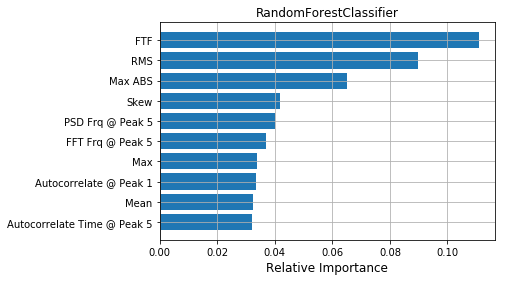

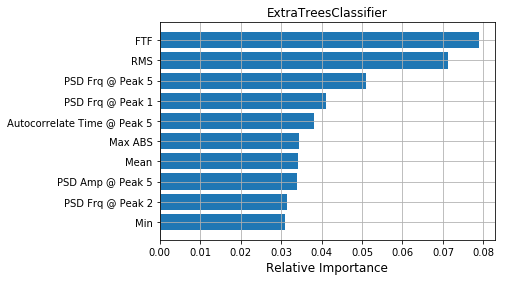

In [6]:
"""
MODEL SELECTION
"""

#Quick Demonstration
#Get models
models = GetOnlyTwoModelsForComparison()
#Get Result arrays
results,string,string1,time,fig = FeatureComparison(models,X_train, X_test, Y_train, Y_test,UserInput)
#Save Result arrays to Files
GenerateComparisonResultFiles(results,string,string1,time,fig,str1 = 'zGraphs.pdf',\
                                  str2 = 'zTime.txt',str3 = "zNoGraphs.txt",str4 = 'zScore.txt')

#Selecting Type of Classifier
"""
models = GetAllModelsForComparison()
results,string,string1,time,fig = FeatureComparison(models,X_train, X_test, Y_train, Y_test,UserInput)
GenerateComparisonResultFiles(results,string,string1,time,fig)
"""

#Min Sample Split Comparsion
"""
#Generate files as a function of MinSampleSplit
for x in range(1,50,2):
    print(x)
    #Get Models
    models = GetFinalEightModelsForComparison(MinSampleSplit=x)
    #Get Result arrays
    results,string,string1,time,fig = FeatureComparison(models,X_train, X_test, Y_train, Y_test,UserInput)
    #Generate Save File Names
    Graphname = 'GraphMinSamples' + str(x) + '.pdf'
    Timename = 'TimeMinSamples' + str(x) + '.txt'
    Scoringname = 'ScoreMinSamples' + str(x) + '.txt'
    #Save Result arrays to Files
    GenerateComparisonResultFiles(results,string,string1,time,fig,str1 = Graphname,\
                                  str2 = Timename,str3 = "NoGraphs.txt",str4 = Scoringname)
"""

#Number of Estimators Comparison
"""
#Generate files as a function of Nestimators
for x in range(10,1010,10):
    print(x)
    #Get Models
    models = GetFinalModelForComparison(MinSampleSplit=10, Nestimators = x)
    #Get Result arrays
    results,string,string1,time,fig = FeatureComparison(models,X_train, X_test, Y_train, Y_test,UserInput)
    #Generate Save File Names
    Graphname = 'GraphMinSamples' + str(x) + '.pdf'
    Timename = 'TimeMinSamples' + str(x) + '.txt'
    Scoringname = 'ScoreMinSamples' + str(x) + '.txt'
    #Save Result arrays to Files
    GenerateComparisonResultFiles(results,string,string1,time,fig,str1 = Graphname,\
                                  str2 = Timename,str3 = "NoGraphs.txt",str4 = Scoringname)
"""

print('finished')

In [7]:
"""
MODEL VALIDATION

Demonstrate Selected Model's results using
classification report

Test on the split model
"""

#Train
ClassifierSelectedModel = TrainModel(X_train, Y_train)

#Predict
Y_pred,Y_pred_string = PredictModel(ClassifierSelectedModel,X_test)

#Output Results
print(classification_report(Y_test,Y_pred))

print('\nfinished')

             precision    recall  f1-score   support

        0.0       0.94      0.85      0.89       531
        1.0       0.89      0.84      0.87       815
        2.0       0.89      0.95      0.92      1782
        3.0       1.00      0.65      0.79        34
        4.0       1.00      1.00      1.00        14
        5.0       1.00      0.94      0.97       152
        6.0       0.94      1.00      0.97       122

avg / total       0.91      0.91      0.91      3450


finished


In [8]:
"""
SAVING FINAL MODEL

Train on Final Model using all of the training data

Final Model Calling:
RandomForestClassifier(min_samples_split = 10 ,n_estimators = 200)

Parameters:
{   'bootstrap': True, 
    'class_weight': None, 
    'criterion': 'gini', 
    'max_depth': None, 
    'max_features': 'auto', 
    'max_leaf_nodes': None, 
    'min_impurity_decrease': 0.0, 
    'min_impurity_split': None, 
    'min_samples_leaf': 1, 
    'min_samples_split': 10, 
    'min_weight_fraction_leaf': 0.0, 
    'n_estimators': 200, 
    'n_jobs': 1, 
    'oob_score': False, 
    'random_state': None, 
    'verbose': 0, 
    'warm_start': False}
    
"""
#Train using All Data
FinalClassifier = TrainModel(Xall_train, Yall_train)

filename = 'FullModel.sav' #saving name

# Save Model Using Pickle
#pickle.dump(FinalClassifier, open(filename, 'wb'))

print('finished')

finished


In [9]:
"""
PREDICTION RESULTS
Compared Both Current and Saved Models

"Early": 0
"Suspect": 1
"Normal": 2
"Imminent Failure": 3
"Inner Race Failure": 4 
"Rolling Element Failure": 5
"Stage 2 Failure": 6
"""

#Get test array
X_in_question = getTESTMatrix(UserInput)

#Currently Trained Model
#Predict
prediction,prediction_string = PredictModel(FinalClassifier,X_in_question)
prediction_proba = PredictProbModel(FinalClassifier,X_in_question)

#Output Results
print('Current Model:\n')
print(prediction_string)
print(prediction_proba)


#Saved Model
#Load the saved model using Pickle
LoadedClassifier = pickle.load(open(filename, 'rb'))

#Predict
prediction,prediction_string = PredictModel(LoadedClassifier,X_in_question)
prediction_proba = PredictProbModel(LoadedClassifier,X_in_question)

#Output Results
print('\n')
print('Loaded Model:\n')
print(prediction_string)
print(prediction_proba)

print('\nfinished')

"""END OF MODEL CHARACTERIZING"""

Current Model:

['Early']
[[81.62364164  5.29960317 13.07675519  0.          0.          0.
   0.        ]]


Loaded Model:

['Early']
[[76.87591159  7.63247169 15.29161672  0.          0.          0.2
   0.        ]]

finished


'END OF MODEL CHARACTERIZING'

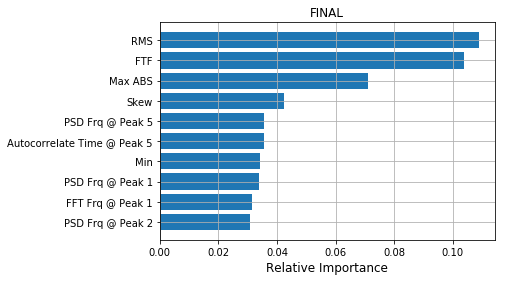

In [10]:
"""
BEGIN SIMPLIFIED MODEL CHARACTERIZING
"""
"""
FEATURE IMPORTANCE
"""

#Plot Bar Graph with Most Import Features
m = LoadedClassifier.feature_importances_ #Get indices of most important features
m1 = GetTESTDataFrameNames(UserInput) #Get the names of the corresponding features
Z = [x for _,x in sorted(zip(m,m1))] #correspondingly sort the names according to feature indices (descending)
Z1 = sorted(m) #Sort the features importance
fig = getBarPlot(Z1[-10:],Z[-10:],"Relative Importance","FINAL") #Plot the 10 most important features
fig.savefig("FeatureExtraction.jpg", dpi='figure', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.5,
        frameon=None, metadata=None)

In [11]:
"""
REDUCED MODEL VALIDATION
"""

#Load raw data
filename = 'NotNormalized.csv'
dataset = pd.read_csv(filename,header = 0,index_col = 0)
ReducedFeatureTrainingData, StateTrain = GetReducedFeatureArraysFromDataFrame(dataset)


#Only show the results of 10 features
ReducedFeatureTrainingData, StateTrain = GetFinalReducedFeatureArraysFromDataFrame(dataset)


result,header = ReducedFeatureComparison(ReducedFeatureTrainingData,StateTrain)
#GenerateFeatureFile('zFeatureSimplicationResults.txt',result,header)

print(header[0])
print(result[0])
print('finished')


Feature Number (10):
             precision    recall  f1-score   support

        0.0       0.82      0.77      0.79       531
        1.0       0.83      0.77      0.80       815
        2.0       0.85      0.90      0.87      1782
        3.0       1.00      0.41      0.58        34
        4.0       1.00      0.93      0.96        14
        5.0       0.99      0.94      0.96       152
        6.0       0.92      1.00      0.96       122

avg / total       0.85      0.85      0.85      3450

finished


In [12]:
"""
EXTRACT ACTUAL DATA
"""

#Import Raw Data
filename = 'AccelerometerActualData.csv'
time,amp = getValuesFromRawData(filename)

print(time[0:5])
print(amp[0:5])
print('Finished')

[0.002419949, 0.003725052, 0.0054090019999999996, 0.006886005, 0.008362055]
[31651, 31443, 31437, 31646, 32407]
Finished


In [13]:
"""
SIMULATE RECEIVING NEEDED PARAMETERS
"""
#Simulate Getting GUI Info
n = 50 #will be measured using proximity sensor
N = 8 #user inputted
Bd = 0.331*254 #user inputted
Pd = 2.815*254 #user inputted
phi = 15.17 * np.pi / 180 #user inputted
SampleFrequency = 680 #known
FileName = 'AccelerometerActualData.csv'
HomeDirectory = os.getcwd()
directory = os.listdir(HomeDirectory)
TrainingDataFile = "NotNormalized.csv"
UserInputWithActualData = UserInputs2WorkingForm(n,N,Bd,Pd,phi,SampleFrequency,FileName,amp,HomeDirectory,directory,TrainingDataFile)

print('Finished')

Finished


In [14]:
"""
GET TRAINING DATA
"""
#For training over entire file
_, State10, dataset_all = GetTrainingData(UserInputWithActualData)
Feature10 = Get10FeaturesFromDataFrame(dataset_all)

In [15]:
"""
SAVING SHORT MODEL
This section generates and saves the Machine Learning model

This section is not to be run on the actual microcontroller. 

"""

ShortClassifier = TrainModel(Feature10.values[:,0:(Feature10.shape[1]-1)],State10)

filename = 'ShortModel.sav'
#pickle.dump(ShortClassifier, open(filename, 'wb'))
print('finished')

print('finished')

finished
finished


In [16]:
"""
PREDICTING

"Early": 0
"Suspect": 1
"Normal": 2
"Imminent Failure": 3
"Inner Race Failure": 4 
"Rolling Element Failure": 5
"Stage 2 Failure": 6
"""

#Get Dataframe that would be used with the full model
ActualDataFrame = getTESTDataFrame(UserInputWithActualData)

#Extract Final 10 Features
ActualDataFrame10 = Get10FeaturesFromDataFrame(ActualDataFrame)


#Currently Trained Model
#Predict
prediction,prediction_string = PredictModel(ShortClassifier,ActualDataFrame10.values[:,0:(ActualDataFrame10.shape[1]-1)])
prediction_proba = PredictProbModel(ShortClassifier,ActualDataFrame10.values[:,0:(ActualDataFrame10.shape[1]-1)])

#Output Results
print('Current Model\n')
print(prediction_string)
print(prediction_proba)

#Saved model
#Load the saved model
LoadedClassifierShort = pickle.load(open('ShortModel.sav', 'rb'))

#Predict
prediction,prediction_string = PredictModel(LoadedClassifierShort,ActualDataFrame10.values[:,0:(ActualDataFrame10.shape[1]-1)])
prediction_proba = PredictProbModel(LoadedClassifierShort,ActualDataFrame10.values[:,0:(ActualDataFrame10.shape[1]-1)])

#Output Results
print('\nLoaded Model\n')
print(prediction_string)
print(prediction_proba)

print('finished')

"""END SIMPLIFIED MODEL CHARACTERIZING"""


Current Model

['Early']
[[6.98420260e+01 1.28705218e+01 1.72419976e+01 4.54545455e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]

Loaded Model

['Early']
[[76.47579365  9.88937868 13.63482767  0.          0.          0.
   0.        ]]
finished


'END SIMPLIFIED MODEL CHARACTERIZING'

finished


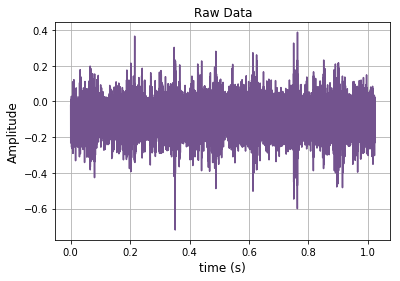

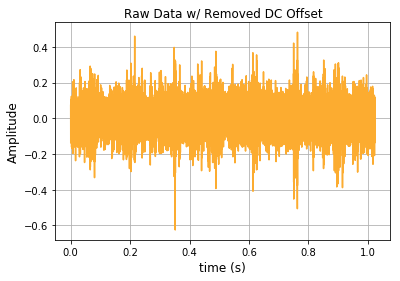

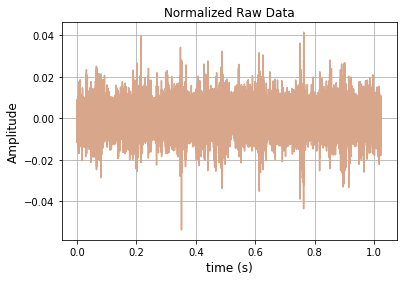

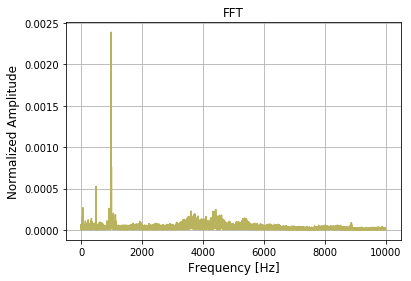

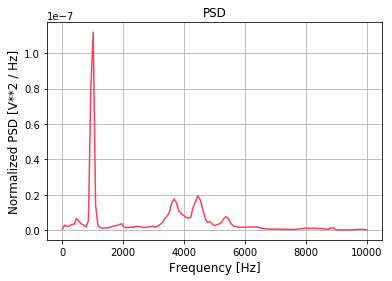

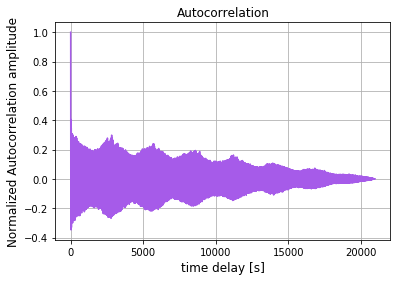

In [17]:
"""
Demonstrate Graphing Capabilites 
Combines the GraphDemonstration graphs for a single sample
"""

#Get 6 Graphs corresponding to the simulated user input
figs = getGraphs(UserInput)

print('finished')

In [18]:
figs[3].savefig("FFT.jpg", dpi='figure', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.0,
        frameon=None, metadata=None)
figs[4].savefig("PSD.jpg", dpi='figure', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.0,
        frameon=None, metadata=None)
figs[5].savefig("AutoCorr.jpg", dpi='figure', facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.0,
        frameon=None, metadata=None)

finished


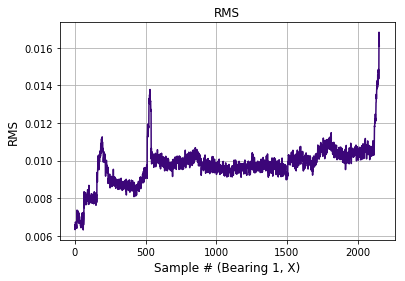

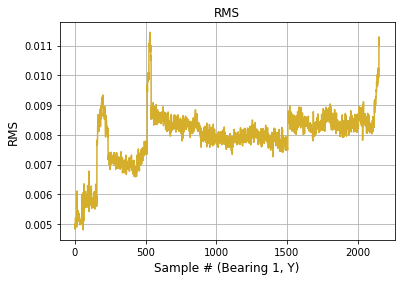

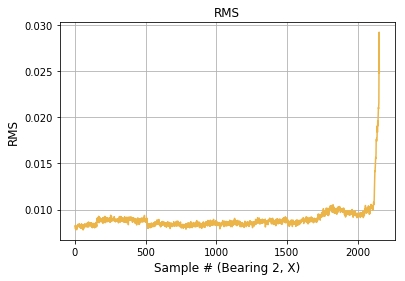

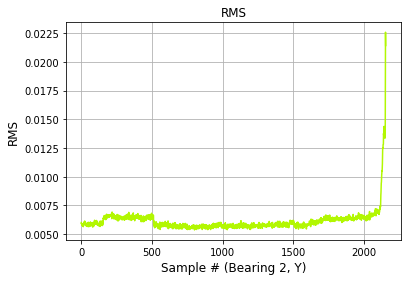

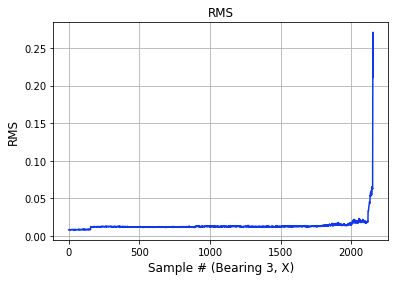

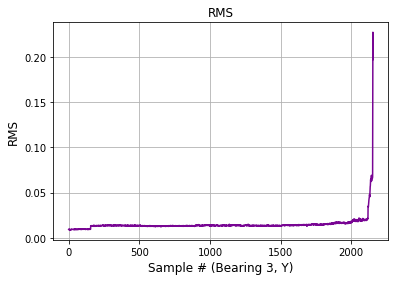

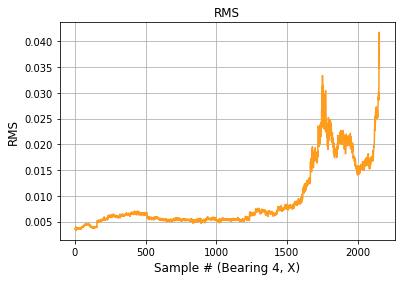

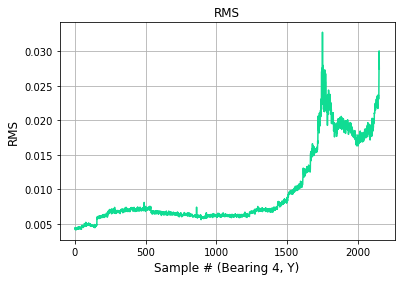

In [19]:
"Demonstration of the Dependence of RMS"

#read the training file
filename = 'NotNormalized.csv'
dataset = pd.read_csv(filename,header = 0,index_col = 0)

#Plot the rms of each bearing
figs = []
figs.append(getPlot(dataset.index[0:2155],dataset["RMS"][0:2155].values,"Sample # (Bearing 1, X)","RMS","RMS"))
figs.append(getPlot(dataset.index[2156:4311],dataset["RMS"][2156:4311].values,"Sample # (Bearing 1, Y)","RMS","RMS"))
figs.append(getPlot(dataset.index[4312:6467],dataset["RMS"][4312:6467].values,"Sample # (Bearing 2, X)","RMS","RMS"))
figs.append(getPlot(dataset.index[6468:8623],dataset["RMS"][6468:8623].values,"Sample # (Bearing 2, Y)","RMS","RMS"))
figs.append(getPlot(dataset.index[8624:10779],dataset["RMS"][8624:10779].values,"Sample # (Bearing 3, X)","RMS","RMS"))
figs.append(getPlot(dataset.index[10780:12935],dataset["RMS"][10780:12935].values,"Sample # (Bearing 3, Y)","RMS","RMS"))
figs.append(getPlot(dataset.index[12936:15091],dataset["RMS"][12936:15091].values,"Sample # (Bearing 4, X)","RMS","RMS"))
figs.append(getPlot(dataset.index[15092:17247],dataset["RMS"][15092:17247].values,"Sample # (Bearing 4, Y)","RMS","RMS"))

print('finished')